In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("iris.csv")

In [8]:


df = df.rename(columns = {"5.1":"sepal_length","3.5":"sepal_width","1.4":"petal_length","0.2":"petal_width","Iris-setosa":"species"})

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
X_train.count()


NameError: name 'X_train' is not defined

In [12]:
df.shape


(149, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
df.groupby('species').size()

species
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


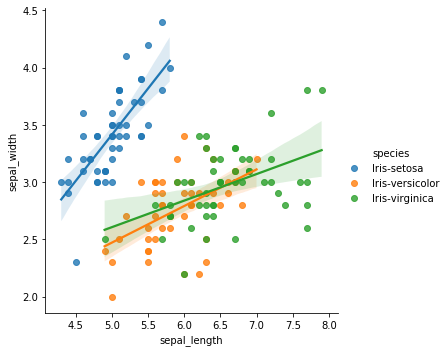

In [17]:
sns.lmplot(x="sepal_length",y="sepal_width", hue="species",data=df)

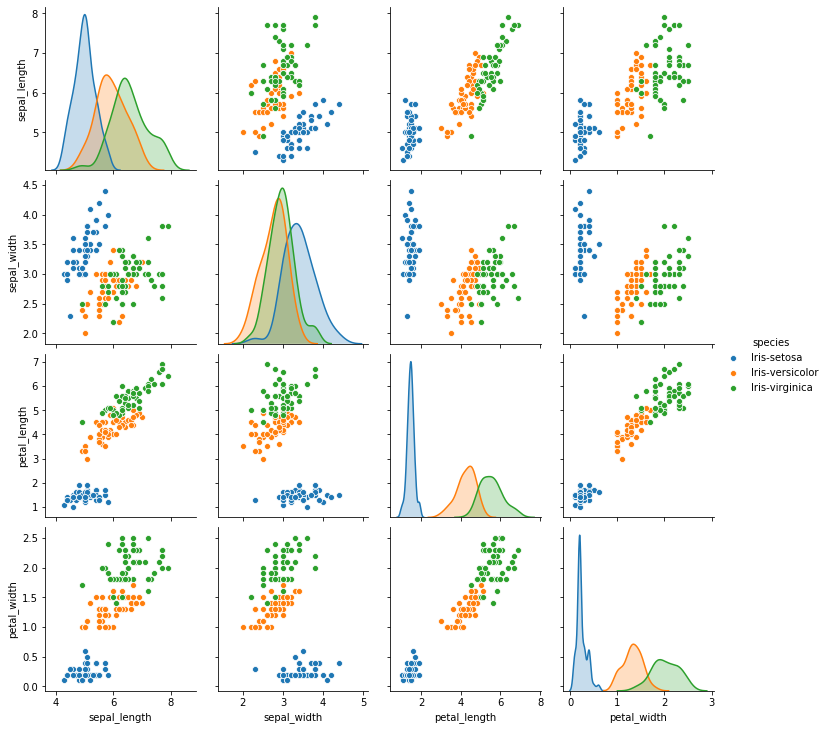

In [18]:
sns.pairplot(hue="species",data = df)

Standarize the variables

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("species",axis=1))
scaled_features = scaler.transform(df.drop("species",axis=1))

In [20]:
df_feat =pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.148356,-0.118060,-1.353964,-1.325063
1,-1.390542,0.344859,-1.410986,-1.325063
2,-1.511636,0.113399,-1.296943,-1.325063
3,-1.027262,1.270695,-1.353964,-1.325063
4,-0.542889,1.965072,-1.182901,-1.061466


In [21]:
X=np.array(df_feat.iloc[:,0:4])
y= np.array(df[['species']])

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

C:\Users\navne\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(119, 4)
(119,)
(30, 4)
(30,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
pred = knn.predict(X_test)
print(pred)

[2 0 2 0 2 0 0 2 0 2 2 0 1 1 2 1 2 2 1 0 0 1 1 0 2 1 1 1 1 2]


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[9 0 0]
 [0 9 2]
 [0 1 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.82      0.86        11
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [32]:
acc = accuracy_score(y_test, pred)
print("accuracy:{}".format(100*acc))

accuracy:90.0


In [33]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
     

Text(0, 0.5, 'Error Rate')

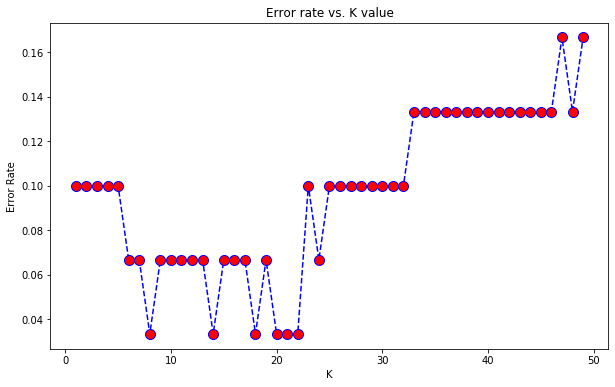

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',
         linestyle='dashed', marker='o',markerfacecolor='red',
         markersize=10)
plt.title('Error rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("WITH K=10")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [40]:
# NOW WITH K=40

knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = 40')
print('\n')
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

WITH K = 40


[[9 0 0]
 [0 8 3]
 [0 1 9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.73      0.80        11
           2       0.75      0.90      0.82        10

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.88      0.87      0.87        30

